# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
#DataFrame shapes (rows, columns)
print(f"Median Houshold Income: {df_hh_income.shape}")
print(f"People below Poverty Level: {df_pct_poverty.shape}")
print(f"Completed High School: {df_pct_completed_hs.shape}")
print(f"Race by City: {df_share_race_city.shape}")
print(f"Deaths by Police: {df_fatalities.shape}")

Median Houshold Income: (29322, 3)
People below Poverty Level: (29329, 3)
Completed High School: (29329, 3)
Race by City: (29268, 7)
Deaths by Police: (2535, 14)


In [6]:
#DataFrame column names
print(f"Median Houshold Income: {df_hh_income.columns}")
print(f"People below Poverty Level: {df_pct_poverty.columns}")
print(f"Completed High School: {df_pct_completed_hs.columns}")
print(f"Race by City: {df_share_race_city.columns}")
print(f"Deaths by Police: {df_fatalities.columns}")

Median Houshold Income: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
People below Poverty Level: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Completed High School: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Race by City: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Deaths by Police: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
#NaN values
print(f"Median Houshold Income: {df_hh_income.isna().values.sum()}")
print(f"People below Poverty Level: {df_pct_poverty.isna().values.sum()}")
print(f"Completed High School: {df_pct_completed_hs.isna().values.sum()}")
print(f"Race by City: {df_share_race_city.isna().values.sum()}")
print(f"Deaths by Police: {df_fatalities.isna().values.sum()}")

Median Houshold Income: 51
People below Poverty Level: 0
Completed High School: 0
Race by City: 0
Deaths by Police: 346


In [8]:
#Duplicates
print(f"Median Houshold Income: {df_hh_income.duplicated().values.any()}")
print(f"People below Poverty Level: {df_pct_poverty.duplicated().values.any()}")
print(f"Completed High School: {df_pct_completed_hs.duplicated().values.any()}")
print(f"Race by City: {df_share_race_city.duplicated().values.any()}")
print(f"Deaths by Police: {df_fatalities.duplicated().values.any()}")

Median Houshold Income: False
People below Poverty Level: False
Completed High School: False
Race by City: False
Deaths by Police: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [9]:
# nan_rows = df_hh_income.isna().any(axis=1)
df_hh_income.dropna(inplace=True)
df_hh_income.isna().values.sum()

0

In [10]:
df_fatalities.dropna(inplace=True)
df_fatalities.isna().values.sum()

0

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [11]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [12]:
type(df_pct_poverty["poverty_rate"][0])

str

In [13]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].astype(str).str.replace("-", "")
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])

In [14]:
df_pct_poverty.isna().values.sum()

201

In [15]:
df_pct_poverty.dropna(inplace=True)
df_pct_poverty.isna().values.sum()

0

In [16]:
poverty_by_state = df_pct_poverty.groupby(by=["Geographic Area"]).agg({"poverty_rate": pd.Series.mean})
poverty_by_state.sort_values(by="poverty_rate", ascending=False, inplace=True)
poverty_by_state.head()

,poverty_rate
Geographic Area,
MS,26.88
AZ,25.67
GA,23.78
NM,23.08
AR,22.96


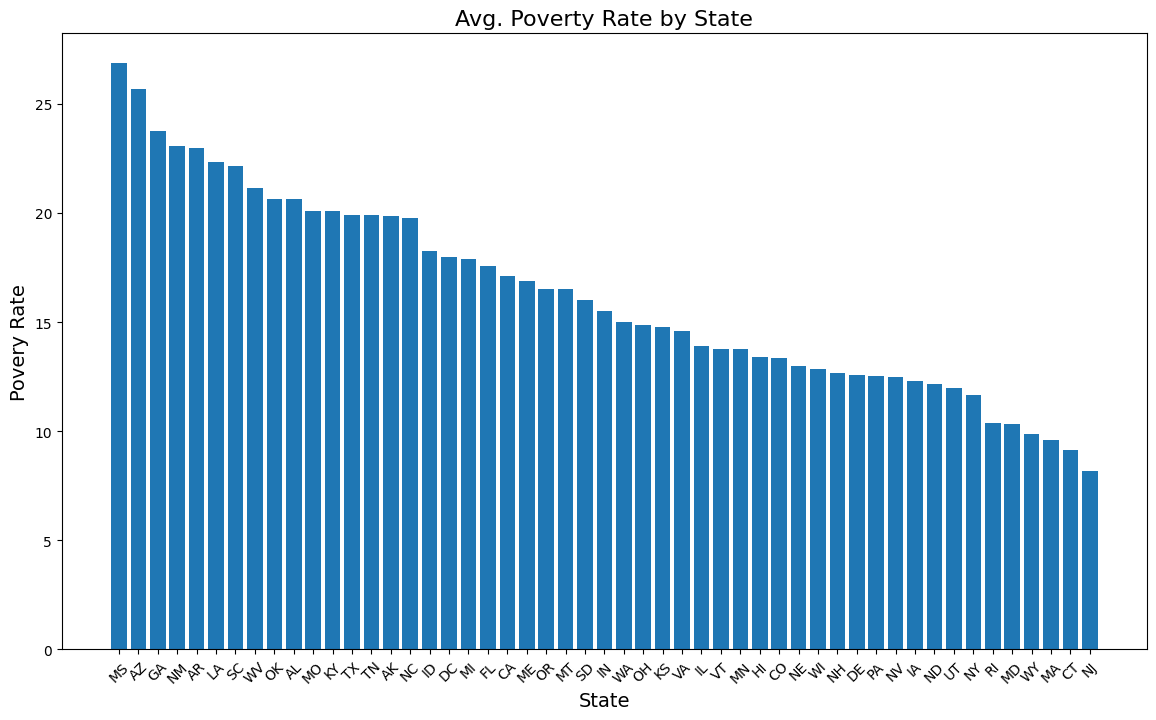

In [17]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.ylabel("Povery Rate", fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Avg. Poverty Rate by State", fontsize=16)
plt.bar(poverty_by_state.index, poverty_by_state.poverty_rate)
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [18]:
df_pct_completed_hs.head(1)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2


In [19]:
type(df_pct_completed_hs["percent_completed_hs"][0])

str

In [20]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].astype(str).str.replace("-", "")
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"])

In [21]:
df_pct_completed_hs.isna().values.sum()

197

In [22]:
df_pct_completed_hs.dropna(inplace=True)
df_pct_completed_hs.isna().values.sum()

0

In [23]:
hs_graduation_by_state = df_pct_completed_hs.groupby(by=["Geographic Area"]).agg({"percent_completed_hs": pd.Series.mean})
hs_graduation_by_state.sort_values(by="percent_completed_hs", inplace=True)
hs_graduation_by_state.head()

,percent_completed_hs
Geographic Area,
TX,75.69
MS,78.47
GA,79.01
LA,79.29
AR,79.95


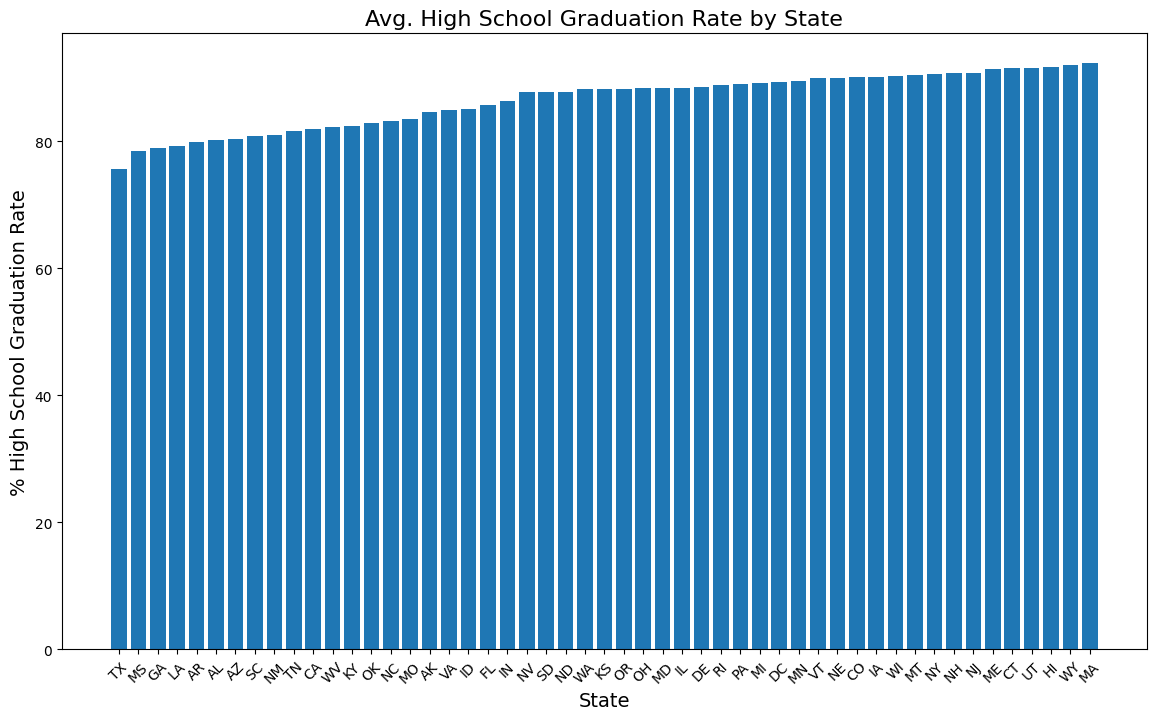

In [24]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.ylabel("% High School Graduation Rate", fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Avg. High School Graduation Rate by State", fontsize=16)
plt.bar(hs_graduation_by_state.index, hs_graduation_by_state["percent_completed_hs"])
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [25]:
poverty_graduation = pd.merge(poverty_by_state, hs_graduation_by_state, on="Geographic Area")
poverty_graduation.head()

,poverty_rate,percent_completed_hs
Geographic Area,,
MS,26.88,78.47
AZ,25.67,80.47
GA,23.78,79.01
NM,23.08,80.98
AR,22.96,79.95


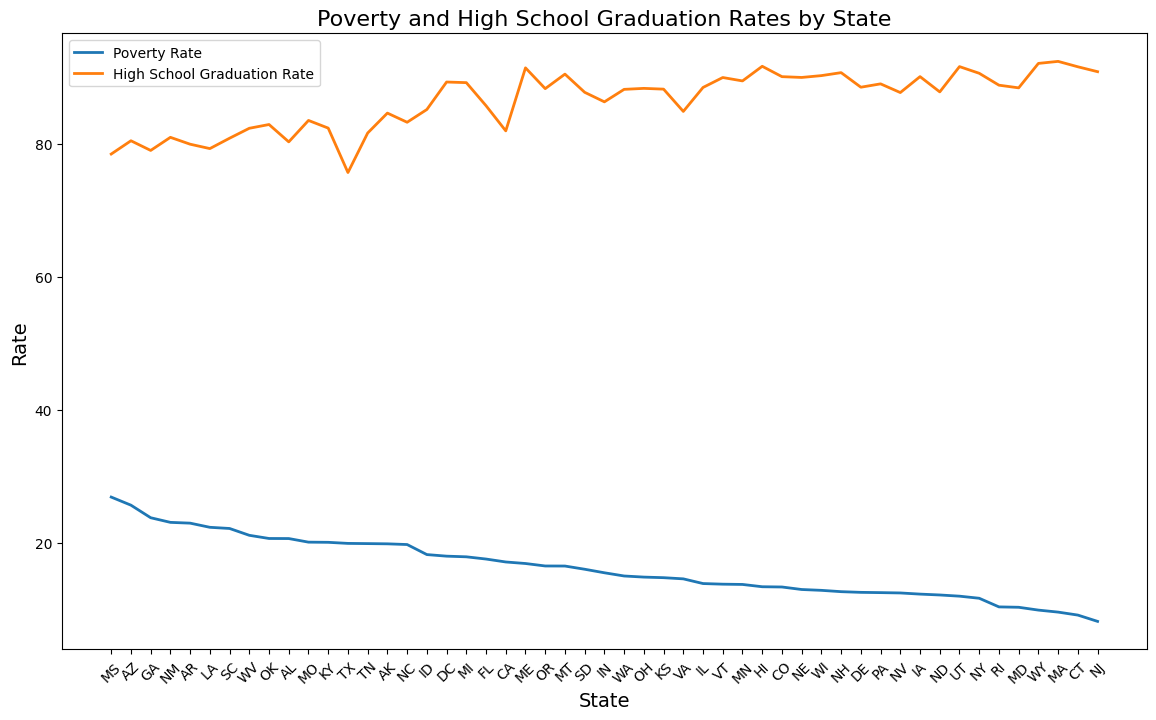

In [26]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.plot(poverty_graduation.index, poverty_graduation.poverty_rate, linewidth=2, label="Poverty Rate")
plt.plot(poverty_graduation.index, poverty_graduation.percent_completed_hs, linewidth=2, label="High School Graduation Rate")
plt.title("Poverty and High School Graduation Rates by State", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Rate", fontsize=14)
plt.legend()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

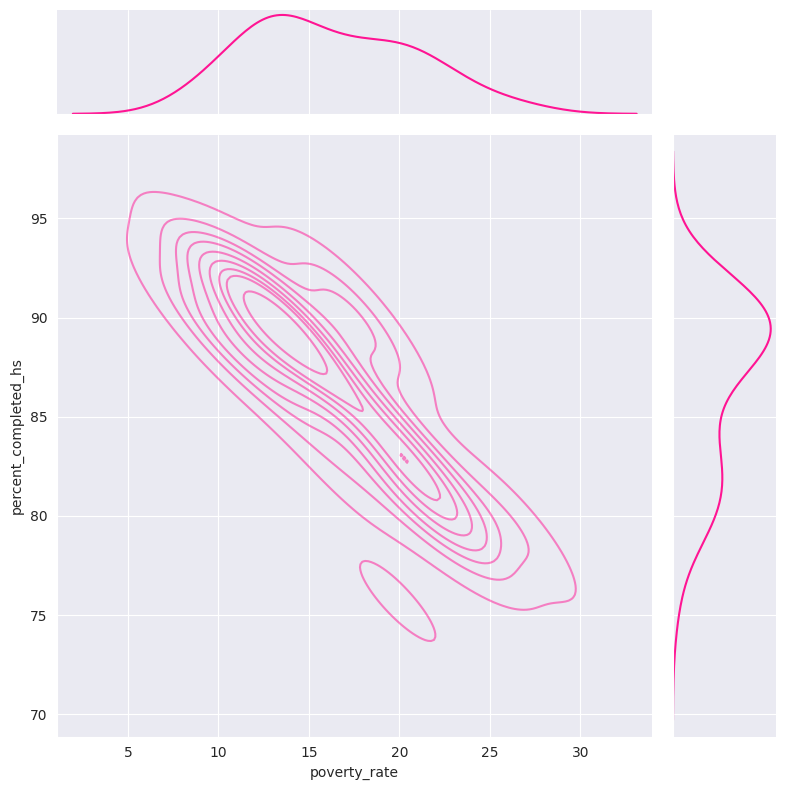

In [27]:
with sns.axes_style("darkgrid"):
  sns.jointplot(x=poverty_graduation["poverty_rate"], y=poverty_graduation["percent_completed_hs"], height=8, kind="kde", color="deeppink", joint_kws={"alpha":0.5})
plt.show()

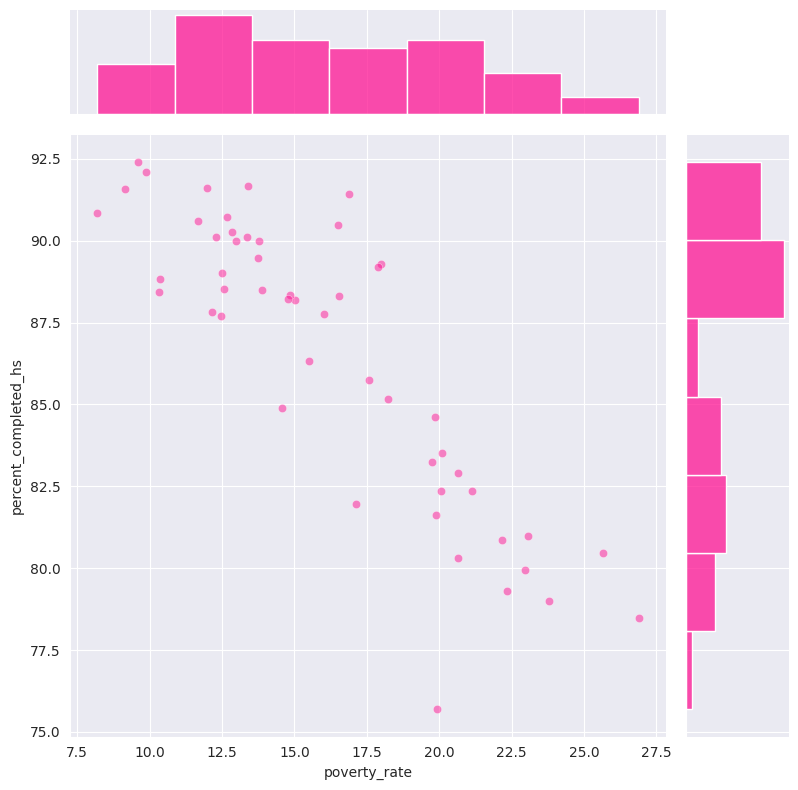

In [28]:
with sns.axes_style("darkgrid"):
  sns.jointplot(x=poverty_graduation["poverty_rate"], y=poverty_graduation["percent_completed_hs"], height=8, kind="scatter", color="deeppink", joint_kws={"alpha":0.5})
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

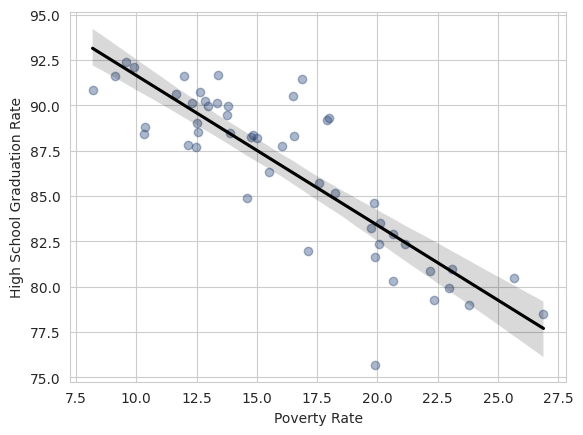

In [29]:
with sns.axes_style("whitegrid"):
  ax = sns.regplot(data=poverty_graduation, x="poverty_rate", y="percent_completed_hs", color="#2f4b7c", scatter_kws={"alpha": 0.4}, line_kws={"color": "black"})
  ax.set(ylabel="High School Graduation Rate", xlabel="Poverty Rate")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [30]:
df_share_race_city.head(1)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6


In [31]:
print(f"share_white: {type(df_share_race_city.share_white[0])}")
print(f"share_black: {type(df_share_race_city.share_black[0])}")
print(f"share_native_american: {type(df_share_race_city.share_native_american[0])}")
print(f"share_asian: {type(df_share_race_city.share_asian[0])}")
print(f"share_hispanic: {type(df_share_race_city.share_hispanic[0])}")

share_white: <class 'str'>
share_black: <class 'str'>
share_native_american: <class 'str'>
share_asian: <class 'str'>
share_hispanic: <class 'str'>


In [32]:
print(df_share_race_city[pd.to_numeric(df_share_race_city.share_white, errors="coerce").isnull()])

      Geographic area                                 City share_white  \
630                AK                          Chisana CDP         (X)   
678                AK                             Flat CDP         (X)   
777                AK                        Mertarvik CDP         (X)   
1946               CA                          Almanor CDP         (X)   
2134               CA                          Caribou CDP         (X)   
2160               CA                      Cedar Slope CDP         (X)   
3194               CA                      Silver City CDP         (X)   
3248               CA          Sugarloaf Mountain Park CDP         (X)   
3331               CA  University of California Merced CDP         (X)   
3345               CA                     Valley Wells CDP         (X)   
11621              MA                       Southfield CDP         (X)   
13953              MO                      Florida village         (X)   
14003              MO                 

In [33]:
df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white, errors="coerce")
df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black, errors="coerce")
df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american, errors="coerce")
df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian, errors="coerce")
df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic, errors="coerce")

In [34]:
df_share_race_city.dropna(inplace=True)
df_share_race_city.isna().values.sum()

0

In [35]:
# race_by_state = df_share_race_city.groupby(by=["Geographic area"]).agg({"share_white": pd.Series.mean, "share_black": pd.Series.mean, "share_native_american": pd.Series.mean, "share_asian": pd.Series.mean, "share_hispanic": pd.Series.mean})

race_by_state = df_share_race_city.groupby(by="Geographic area").mean(numeric_only=True)
race_by_state.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


In [36]:
s_bar = px.bar(race_by_state, x=race_by_state.index, y=[race_by_state.share_white, race_by_state.share_black, race_by_state.share_native_american, race_by_state.share_asian, race_by_state.share_hispanic], title="Racial Makeup by State", barmode="stack")
s_bar.update_layout(xaxis_title="State", yaxis_title="Racial Makeup")
s_bar.update_xaxes(tickangle=315)
s_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [37]:
df_fatalities.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False


In [38]:
fatalities_by_race = df_fatalities.race.value_counts()
fatalities_by_race

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [39]:
fig = px.pie(labels=fatalities_by_race.index, values=fatalities_by_race.values, title="Fatalities by Race", names=fatalities_by_race.index, hole=0.4)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="percent")
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:140: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [40]:
fatalities_by_gender = df_fatalities.gender.value_counts()
fatalities_by_gender

M    2160
F      94
Name: gender, dtype: int64

In [41]:
fig = px.pie(labels=fatalities_by_gender.index, values=fatalities_by_gender.values, title="Fatalities by Gender", names=fatalities_by_gender.index)
fig.update_traces(textposition="outside", textfont_size=15, textinfo="percent+label")
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:140: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [42]:
type(df_fatalities.age[0])

numpy.float64

In [43]:
box = px.box(df_fatalities, x="manner_of_death", y="age", color="gender", title="Age and Manner of Death by Gender")
box.update_layout(xaxis_title="Manner of Death", yaxis_title="Age")
box.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [44]:
fatalities_armed = df_fatalities.armed.value_counts()
fatalities_armed

gun            1247
knife           324
unarmed         165
vehicle         158
toy weapon      102
               ... 
chain saw         1
garden tool       1
pole              1
pick-axe          1
pen               1
Name: armed, Length: 67, dtype: int64

In [45]:
s_bar = px.bar(fatalities_armed, x=fatalities_armed.index, y=fatalities_armed.values, title="Fatalities by Armed Weapon Type")
s_bar.update_layout(xaxis_title="Armed", yaxis_title="Number of Fatalities")
s_bar.show()

In [46]:
total_fatalities = df_fatalities.name.count()
total_fatalities

2254

In [47]:
armed = df_fatalities[df_fatalities.armed != "unarmed"]
armed_fatalities = armed.name.count()
armed_fatalities

2089

In [48]:
print(f"Percent of armed fatalities: {armed_fatalities / total_fatalities * 100:.2f}%")
print(f"Percent of unarmed fatalities: {(total_fatalities - armed_fatalities) / total_fatalities * 100:.2f}%")

Percent of armed fatalities: 92.68%
Percent of unarmed fatalities: 7.32%


In [49]:
df_fatalities["gun"] = np.where(df_fatalities.armed =="gun", "Yes", "No")
df_fatalities.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,gun
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Yes


In [50]:
armed_gun = df_fatalities.groupby(by="gun").agg({"name": pd.Series.count})
armed_gun.rename(columns={"name": "number"}, inplace=True)
armed_gun

,number
gun,
No,1007
Yes,1247


In [51]:
print(f"Percent of fatalities armed with guns: {armed_gun.number[1] / (armed_gun.number[0] + armed_gun.number[1]) * 100:.2f}%")

Percent of fatalities armed with guns: 55.32%


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [52]:
age_threshold = 25
df_fatalities["under_25"] = np.where(df_fatalities.age < age_threshold, "Yes", "No")
df_fatalities.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,gun,under_25
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Yes,No


In [53]:
young = df_fatalities[df_fatalities.under_25=="Yes"]
young_count = young.name.count()
young_count

422

In [54]:
print(f"Percent of people killed under 25 years old: {young_count / total_fatalities * 100:.2f}%")

Percent of people killed under 25 years old: 18.72%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

<Figure size 1280x960 with 0 Axes>

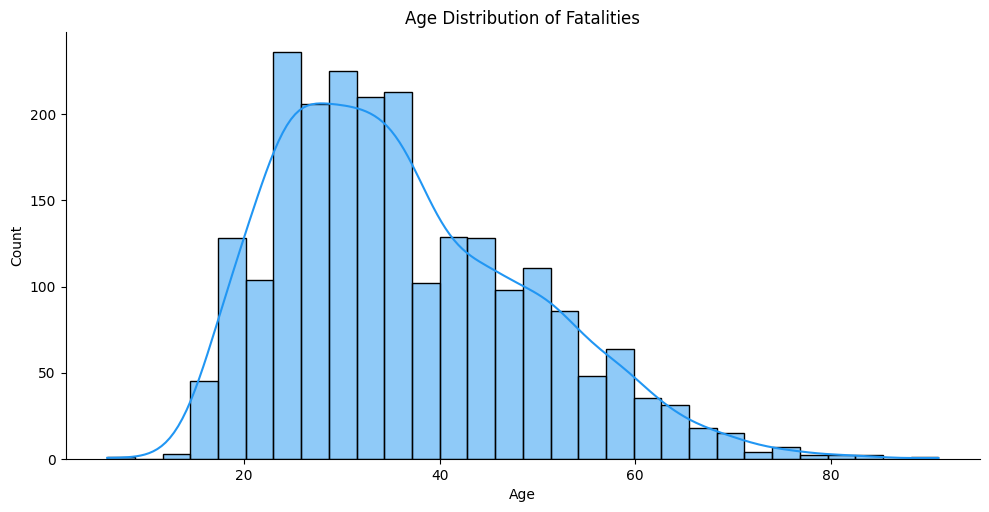

In [55]:
plt.figure(dpi=200)
sns.displot(df_fatalities.age, bins=30, aspect=2, kde=True, color="#2196f3")
plt.xlabel("Age")
plt.title("Age Distribution of Fatalities")
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

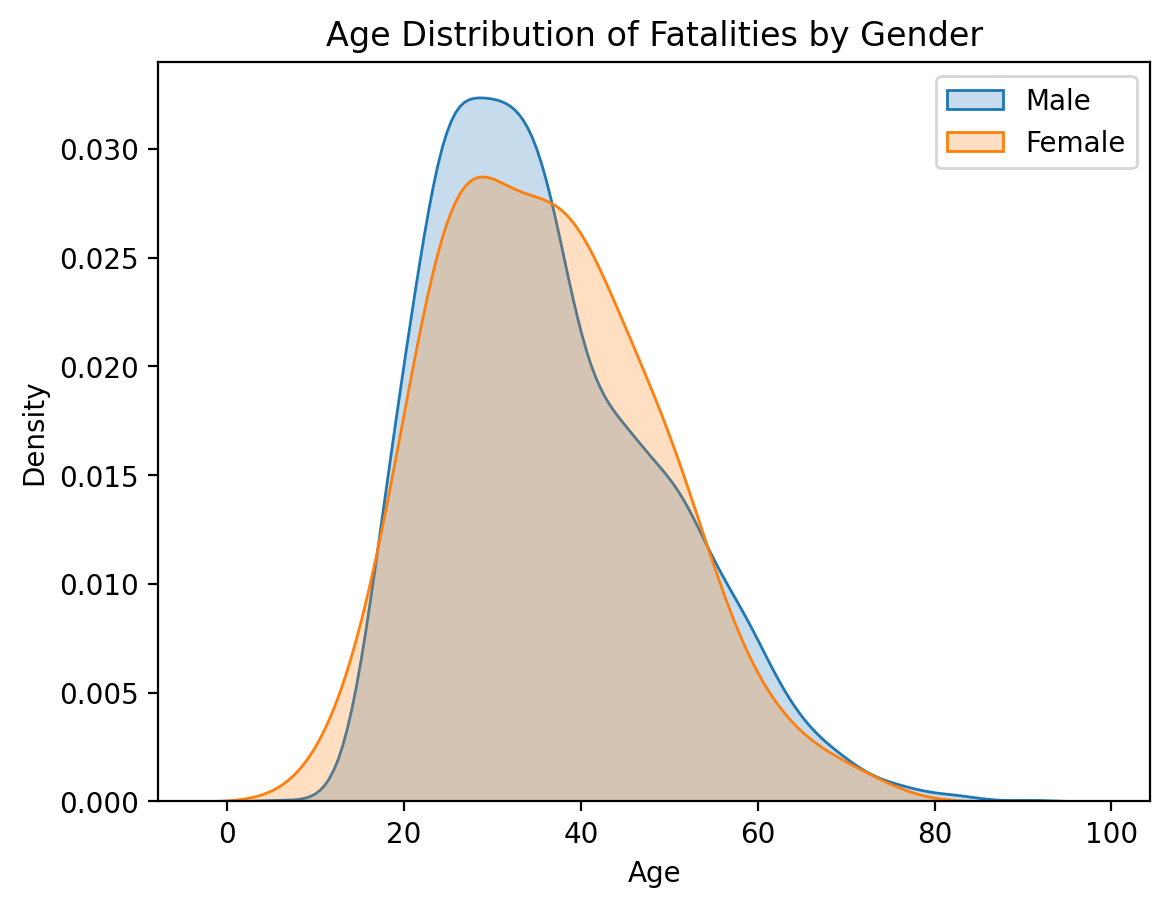

In [56]:
male = df_fatalities[df_fatalities.gender=="M"]
female = df_fatalities[df_fatalities.gender=="F"]

plt.figure(dpi=200)
sns.kdeplot(male.age, fill=True, label="Male")
sns.kdeplot(female.age, fill=True, label="Female")
plt.xlabel("Age")
plt.title("Age Distribution of Fatalities by Gender")
plt.legend()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [57]:
bar = px.bar(x=fatalities_by_race.index, y=fatalities_by_race.values, title="Fatalities by Race")
bar.update_layout(xaxis_title="Race", yaxis_title="Number of Fatalities")
bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [58]:
df_fatalities.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,gun,under_25
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Yes,No


In [59]:
mental_illness_count = df_fatalities.signs_of_mental_illness.value_counts()
mental_illness_count

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

In [60]:
type(df_fatalities.signs_of_mental_illness[0])

numpy.bool_

In [61]:
mental_illness = df_fatalities[df_fatalities.signs_of_mental_illness==True]
mental_illness_number = mental_illness.name.count()

print(f"Percent of Fatalities with Mental Illness: {mental_illness_number / total_fatalities * 100:.2f}%")

Percent of Fatalities with Mental Illness: 25.42%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [62]:
top_cities = df_fatalities.groupby(by=["city", "state"], as_index=False).agg({"name": pd.Series.count})
top_cities.rename(columns={"name": "number"}, inplace=True)
top_cities.sort_values(by="number", ascending=False, inplace=True, ignore_index=True)
top_10cities = top_cities[:10]
top_10cities

,city,state,number
0,Los Angeles,CA,35
1,Phoenix,AZ,28
2,Houston,TX,23
3,Chicago,IL,22
4,Las Vegas,NV,17
5,Austin,TX,16
6,San Antonio,TX,15
7,Columbus,OH,14
8,Indianapolis,IN,14
9,St. Louis,MO,14


In [63]:
bar = px.bar(top_10cities, x="city", y="number", title="Top 10 Cities with Fatalities")
bar.update_layout(xaxis_title="City", yaxis_title="Number of Fatalities")
bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [64]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30


In [65]:
pd.options.mode.copy_on_write = True

def adjust_city(city):
  city = city + " city"
  return city

top_10cities["city_long"] = top_10cities["city"].apply(adjust_city)

In [66]:
df_share_race_city.rename(columns={"Geographic area": "state", "City": "city_long"}, inplace=True)

In [67]:
share_race_city_top10 = pd.merge(df_share_race_city, top_10cities, on=["state", "city_long"])
share_race_city_top10

,state,city_long,share_white,share_black,share_native_american,share_asian,share_hispanic,city,number
0,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80,Phoenix,28
1,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50,Los Angeles,35
2,IL,Chicago city,45.00,32.90,0.50,5.50,28.90,Chicago,22
3,IN,Indianapolis city,62.00,27.30,0.30,2.10,9.40,Indianapolis,14
4,MO,St. Louis city,43.90,49.20,0.30,2.90,3.50,St. Louis,14
5,NV,Las Vegas city,62.10,11.10,0.70,6.10,31.50,Las Vegas,17
6,OH,Columbus city,61.50,28.00,0.30,4.10,5.60,Columbus,14
7,TX,Austin city,68.30,8.10,0.90,6.30,35.10,Austin,16
8,TX,Houston city,50.50,23.70,0.70,6.00,43.80,Houston,23
9,TX,San Antonio city,72.60,6.90,0.90,2.40,63.20,San Antonio,15


In [68]:
s_bar = px.bar(share_race_city_top10, x=share_race_city_top10.city, y=[share_race_city_top10.share_white, share_race_city_top10.share_black, share_race_city_top10.share_native_american, share_race_city_top10.share_asian, share_race_city_top10.share_hispanic], title="Racial Makeup in Top 10 Cities", barmode="stack")
s_bar.update_layout(xaxis_title="City", yaxis_title="Racial Makeup")
s_bar.update_xaxes(tickangle=315)
s_bar.show()

In [69]:
df_fatalities_top10cities = pd.merge(df_fatalities, share_race_city_top10, on=["state", "city"])
df_fatalities_top10cities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,body_camera,gun,under_25,city_long,share_white,share_black,share_native_american,share_asian,share_hispanic,number
0,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.00,M,B,Columbus,OH,...,False,No,No,Columbus city,61.50,28.00,0.30,4.10,5.60,14
1,350,Jermonte Fletcher,27/01/15,shot,gun,33.00,M,B,Columbus,OH,...,False,Yes,No,Columbus city,61.50,28.00,0.30,4.10,5.60,14
2,312,Jason Smith,21/03/15,shot,gun,42.00,M,W,Columbus,OH,...,False,Yes,No,Columbus city,61.50,28.00,0.30,4.10,5.60,14
3,917,Kaleb Alexander,15/10/15,shot,gun,25.00,M,B,Columbus,OH,...,False,Yes,No,Columbus city,61.50,28.00,0.30,4.10,5.60,14
4,1030,Barry Kirk,23/11/15,shot,gun,50.00,M,W,Columbus,OH,...,False,Yes,No,Columbus city,61.50,28.00,0.30,4.10,5.60,14


In [70]:
city_list = ["Phoenix", "Los Angeles", "Chicago", "Indianapolis", "St. Louis", "Las Vegas", "Columbus", "Austin", "Houston", "San Antonio"]

data = []
df = pd.DataFrame(data)

for city in city_list:
  df_city = df_fatalities_top10cities[df_fatalities_top10cities.city==city]
  city_total = df_city.number.mean()
  city_race = Counter(df_city.race)

  df_race = pd.DataFrame.from_dict(city_race, orient='index').reset_index()
  df_race.rename(columns={"index": "race", 0: "count"}, inplace=True)
  df_race["city"] = city
  df_race["number"] = city_total
  df_race["rate"] = df_race["count"] / df_race["number"]

  df = pd.concat([df, df_race], axis=0, ignore_index=True)

df.head()


,race,count,city,number,rate
0,N,3,Phoenix,28.00,0.11
1,W,12,Phoenix,28.00,0.43
2,H,11,Phoenix,28.00,0.39
3,B,2,Phoenix,28.00,0.07
4,H,18,Los Angeles,35.00,0.51


In [71]:
s_bar = px.bar(df, x="city", y="rate", title="Rate of Fatalities by Race in Top 10 Cities", color="race", barmode="stack")
s_bar.update_layout(xaxis_title="City", yaxis_title="Rate")
s_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [72]:
df_fatalities.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,gun,under_25
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Yes,No


In [73]:
fatalities_by_state = df_fatalities.state.value_counts()

map_fatalities_by_state = px.choropleth(fatalities_by_state, locations=fatalities_by_state.index, color=fatalities_by_state.values, color_continuous_scale=px.colors.sequential.matter, labels={"color": "Number of Fatalities"}, locationmode="USA-states", scope="usa")
map_fatalities_by_state.update_layout(coloraxis_showscale=True, title="Fatalities by State")
map_fatalities_by_state.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [74]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,gun,under_25
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Yes,No
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,Yes,No
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,No,Yes
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,No,No
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,No,No


In [75]:
type(df_fatalities.date[0])

str

In [76]:
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"])
print(type(df_fatalities["date"][0]))
df_fatalities.head(1)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,gun,under_25
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Yes,No


In [77]:
fatalities_by_time = df_fatalities[["date", "name"]].resample("M", on="date").count()
fatalities_by_time.rename(columns={"name": "number"}, inplace=True)
fatalities_by_time.head()

,number
date,
2015-01-31,68
2015-02-28,76
2015-03-31,86
2015-04-30,87
2015-05-31,84


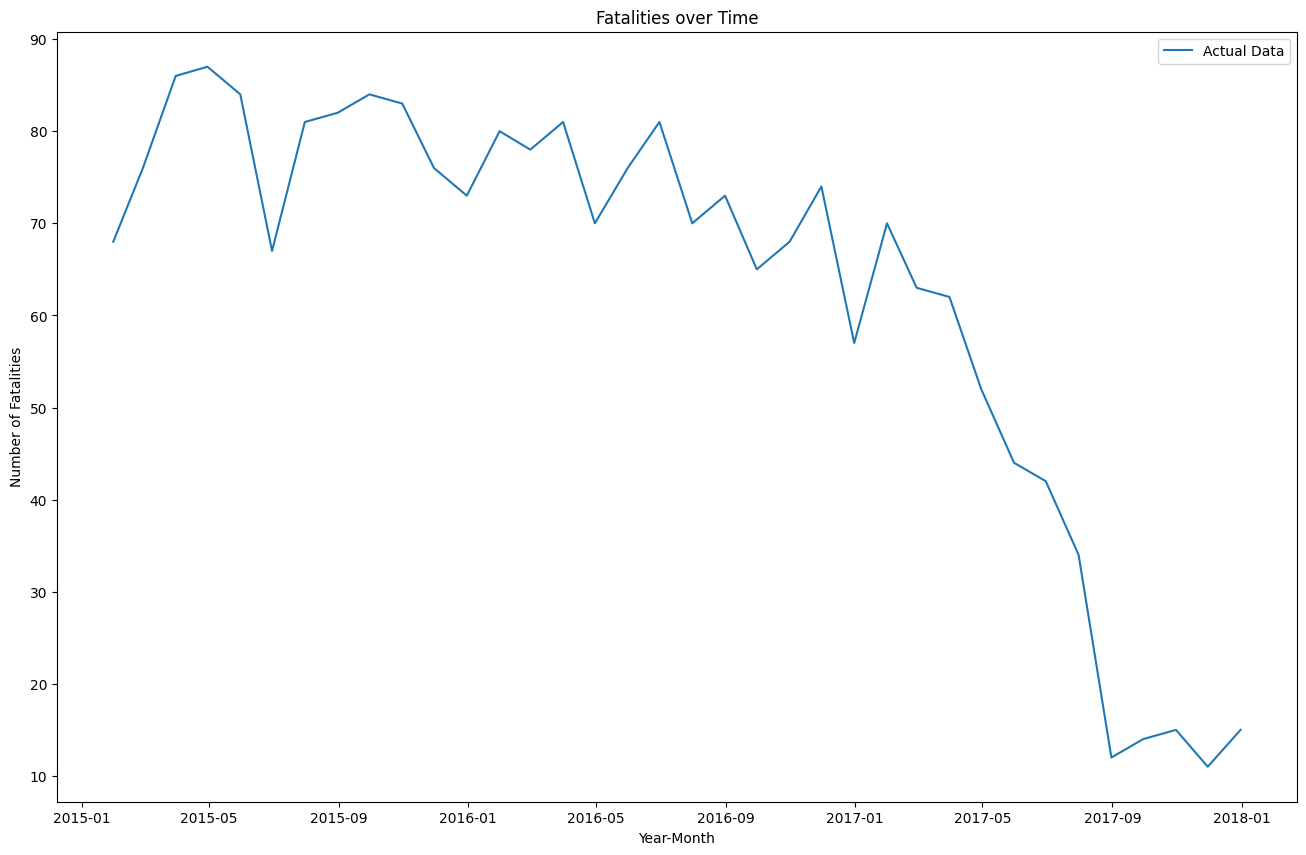

In [78]:
plt.figure(figsize=(16,10))
plt.plot(fatalities_by_time.index, fatalities_by_time.number, label="Actual Data")
plt.title("Fatalities over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Fatalities")

plt.legend()
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).